Nearest-Neighbor Interpolation:

This is a simple algorithm where each output pixel is assigned the value of the closest pixel from the input image.
Bilinear Interpolation:

Bilinear interpolation uses the values of the four nearest pixels to estimate the value of the new pixel. It linearly interpolates in both directions to produce smooth transitions.
Normalized SSD:

Sum of Squared Differences (SSD) computes the squared difference between corresponding pixel values. We normalize it by dividing by the total number of pixels in the image to get a comparable measure across different images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function for Nearest-Neighbor Interpolation
def nearest_neighbor_interpolation(image, scale_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            # Find the nearest pixel from the original image
            nearest_x = int(i / scale_factor)
            nearest_y = int(j / scale_factor)
            zoomed_image[i, j] = image[nearest_x, nearest_y]
    
    return zoomed_image

# Function for Bilinear Interpolation
def bilinear_interpolation(image, scale_factor):
    h, w = image.shape[:2]
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)
    zoomed_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)
    
    for i in range(new_h):
        for j in range(new_w):
            x = i / scale_factor
            y = j / scale_factor
            
            x0 = int(np.floor(x))
            x1 = min(x0 + 1, h - 1)
            y0 = int(np.floor(y))
            y1 = min(y0 + 1, w - 1)
            
            # Interpolation in the x direction
            Ia = image[x0, y0]
            Ib = image[x1, y0]
            Ic = image[x0, y1]
            Id = image[x1, y1]
            
            # Perform bilinear interpolation
            wa = (x1 - x) * (y1 - y)
            wb = (x - x0) * (y1 - y)
            wc = (x1 - x) * (y - y0)
            wd = (x - x0) * (y - y0)
            
            zoomed_image[i, j] = wa * Ia + wb * Ib + wc * Ic + wd * Id
    
    return zoomed_image

# Function to calculate Normalized Sum of Squared Difference (SSD)
def calculate_ssd(original, zoomed):
    diff = original.astype(np.float32) - zoomed.astype(np.float32)
    ssd = np.sum(diff ** 2)
    normalized_ssd = ssd / original.size
    return normalized_ssd

# Load the images (add your paths for the original and zoomed-out images)
original_image = cv2.imread('utils/q05/taylor.jpg')
zoomed_out_image = cv2.imread('utils/q05/taylor_very_small.jpg')

# Zoom back the zoomed-out image by a factor of 4 using Nearest-Neighbor
zoomed_nearest_neighbor = nearest_neighbor_interpolation(zoomed_out_image, 4)

# Zoom back the zoomed-out image by a factor of 4 using Bilinear Interpolation
zoomed_bilinear = bilinear_interpolation(zoomed_out_image, 4)

# Calculate SSD for both methods
ssd_nearest_neighbor = calculate_ssd(original_image, zoomed_nearest_neighbor)
ssd_bilinear = calculate_ssd(original_image, zoomed_bilinear)

# Display the results
print(f"Normalized SSD for Nearest-Neighbor: {ssd_nearest_neighbor}")
print(f"Normalized SSD for Bilinear Interpolation: {ssd_bilinear}")

# Display the images
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(zoomed_nearest_neighbor, cv2.COLOR_BGR2RGB))
plt.title("Nearest-Neighbor Zoomed")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
plt.title("Bilinear Zoomed")

plt.show()

ValueError: operands could not be broadcast together with shapes (560,1000,3) (112,200,3) 

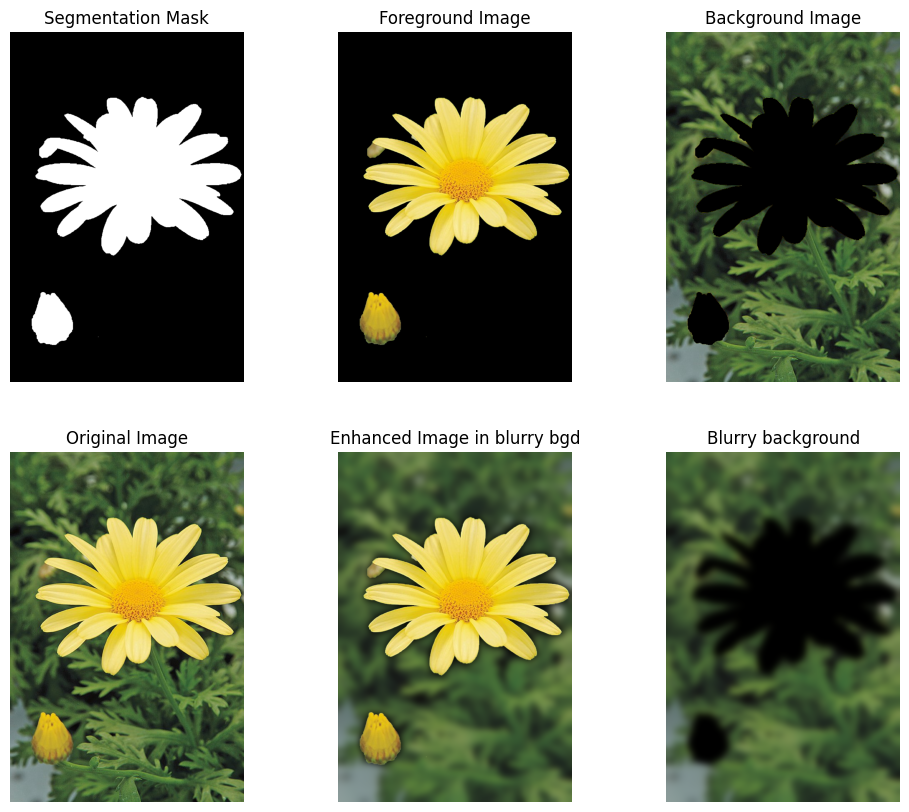

In [9]:

# Import necessary libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread("utils/daisy.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create an initial mask
initial_mask = np.zeros(image.shape[:2], np.uint8)

# Create background and foreground models
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

# Define a rectangle for the GrabCut algorithm
# The rectangle should enclose the object to be segmented (foreground).
rect = (50, 50, image.shape[1]-50, image.shape[0]-50)

# Apply the GrabCut algorithm
cv2.grabCut(image, initial_mask, rect, background_model, foreground_model, 5, cv2.GC_INIT_WITH_RECT)

# Modify the mask such that all probable foreground and definite foreground pixels are marked as foreground
new_mask = np.where((initial_mask == 2) | (initial_mask == 0), 0, 1).astype('uint8')

# Extract the segmented foreground
foreground = image_rgb * new_mask[:, :, np.newaxis]

# Extract the background (everything outside the foreground)
background = image_rgb * (1 - new_mask[:, :, np.newaxis])

blurred_background = cv2.GaussianBlur(background, (55, 55), 0)

# Combine the sharp foreground with the blurred background
enhanced_image = np.where(new_mask[:, :, np.newaxis] == 1, image_rgb, blurred_background)

# Original image blur
daisy_img_rgb_blurred = cv2.GaussianBlur(image_rgb, (55, 55), 0)

# Combine the sharp foreground with the blurred original
enhanced_image_new = np.where(new_mask[:, :, np.newaxis] == 1, image_rgb, daisy_img_rgb_blurred)

# Define the number of subplots and figure size
fig, ax = plt.subplots(2, 3, figsize=(12, 10))

# Plot the first row (Segmentation Mask, Foreground, Background)
ax[0, 0].imshow(new_mask, cmap='gray')
ax[0, 0].set_title('Segmentation Mask')
ax[0, 0].axis('off')

ax[0, 1].imshow(foreground)
ax[0, 1].set_title('Foreground Image')
ax[0, 1].axis('off')

ax[0, 2].imshow(background)
ax[0, 2].set_title('Background Image')
ax[0, 2].axis('off')

# Plot the second row (Original, Enhanced, and Blurred Background)
ax[1, 0].imshow(image_rgb)
ax[1, 0].set_title('Original Image')
ax[1, 0].axis('off')

ax[1, 1].imshow(enhanced_image)
ax[1, 1].set_title('Enhanced Image in blurry bgd')
ax[1, 1].axis('off')

ax[1, 2].imshow(blurred_background)
ax[1, 2].set_title('Blurry background')
ax[1, 2].axis('off')

# Show the combined plot
#plt.tight_layout()
plt.show()